<a href="https://colab.research.google.com/github/soumyb09/soumyb09/blob/tensorflow/tf_muticlass_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist #loading data

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test / 255.0
print('X_train.shape:', X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape: (60000, 28, 28)


In [54]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = 'softmax')
]) #building model

In [55]:
#compiling the model
model.compile(optimizer= 'adam' , 
              loss= 'sparse_categorical_crossentropy' , 
              metrics = ['accuracy'])

In [56]:
#model training
r = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2913 - accuracy: 0.9139 - val_loss: 0.1453 - val_accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1433 - accuracy: 0.9571 - val_loss: 0.0980 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1084 - accuracy: 0.9667 - val_loss: 0.0836 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9732 - val_loss: 0.0799 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0755 - accuracy: 0.9764 - val_loss: 0.0723 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9789 - val_loss: 0.0710 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9809 - val_loss: 0.0711 - val_accuracy:

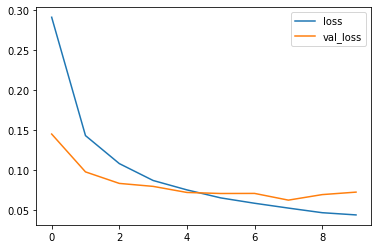

In [57]:
#plotting loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

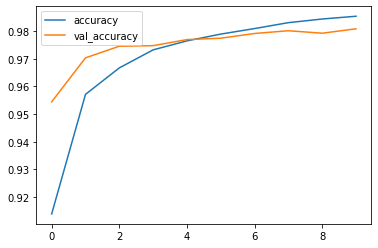

In [58]:
#plotting accuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [59]:
print(model.evaluate(X_test, y_test)) #evaluating model

313/313 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9808
[0.07269950211048126, 0.9807999730110168]


Confusion matris without normalization
[[ 974    0    1    1    0    0    1    1    2    0]
 [   0 1121    4    1    0    1    2    0    6    0]
 [   5    1 1015    2    0    0    3    4    2    0]
 [   1    0    2  991    0    5    0    5    2    4]
 [   3    0    3    1  950    0    6    1    1   17]
 [   2    0    0    6    1  875    1    0    6    1]
 [   4    2    1    1    1    5  943    0    1    0]
 [   1    4    9    4    0    0    0 1005    1    4]
 [   5    0    3    5    1    3    1    6  948    2]
 [   3    2    1    5    3    3    0    2    4  986]]


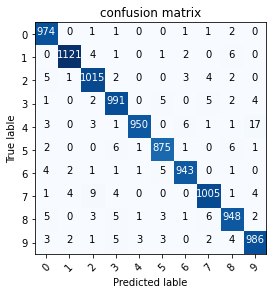

In [61]:
#confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          cmap=plt.cm.Blues):
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matris without normalization")

  print(cm)

  plt.imshow(cm, interpolation= 'nearest', cmap=cmap)
  plt.title('confusion matrix')
  plt.colorbar=()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True lable')
  plt.xlabel('Predicted lable')
  plt.show()

p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 3 predicted: 2')

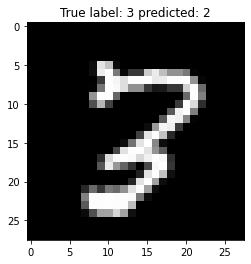

In [62]:
#misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap= 'gray')
plt.title('True label: %s predicted: %s' % (y_test[i], p_test[i]))

Text(0.5, 1.0, 'True label: 3 predicted: 3')

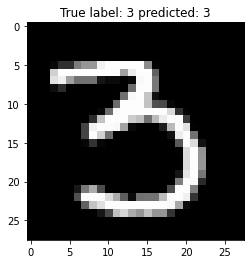

In [63]:
#correctly classifies
classified_idx = np.where(p_test == y_test)[0]
j = np.random.choice(classified_idx)
plt.imshow(X_test[j], cmap= 'gray')
plt.title('True label: %s predicted: %s' % (y_test[j], p_test[j]))